<h1> Job Placement </h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as pt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pickle

In [2]:
df = pd.read_csv('Job_Placement_Data.csv')
df

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


Data Dictionary</br>
gender : Gender of the candidate</br>
ssc_percentage : Senior secondary exams percentage (10th Grade)</br>
ssc_board : Board of education for ssc exams</br>
hsc_percentage : Higher secondary exams percentage (12th Grade)</br>
hsc_borad : Board of education for hsc exams</br>
hsc_subject : Subject of study for hsc</br>
degree_percentage : Percentage of marks in undergrad degree</br>
undergrad_degree : Undergrad degree majors</br>
work_experience : Past work experience</br>
emp_test_percentage : Aptitude test percentage</br>
specialization : Postgrad degree majors - (MBA specialization)</br>
mba_percent : Percentage of marks in MBA degree</br>
status (TARGET) : Status of placement. Placed / Not Placed</br>

<h2> Cleaning and Preparation </h2>

In [3]:
# lets get an overlook of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


First, let's turn the object variables into numerical-categorical variables so that we can actually work with them.

In [4]:
# get the unique 'levels' for each object-type feature
print(
    df['gender'].unique(),
    df['ssc_board'].unique(),
    df['hsc_board'].unique(),
    df['hsc_subject'].unique(),
    df['undergrad_degree'].unique(),
    df['work_experience'].unique(),
    df['specialisation'].unique(),
    df['status'].unique()
     )

['M' 'F'] ['Others' 'Central'] ['Others' 'Central'] ['Commerce' 'Science' 'Arts'] ['Sci&Tech' 'Comm&Mgmt' 'Others'] ['No' 'Yes'] ['Mkt&HR' 'Mkt&Fin'] ['Placed' 'Not Placed']


In [5]:
# let's get the counts for each value so when we turn the categoricals into mumericals, we know the proportions stay the same
print(
    df['gender'].value_counts(), '\n',
    df['ssc_board'].value_counts(), '\n',
    df['hsc_board'].value_counts(), '\n',
    df['hsc_subject'].value_counts(), '\n',
    df['undergrad_degree'].value_counts(), '\n',
    df['work_experience'].value_counts(), '\n',
    df['specialisation'].value_counts(), '\n',
    df['status'].value_counts()
     )

M    139
F     76
Name: gender, dtype: int64 
 Central    116
Others      99
Name: ssc_board, dtype: int64 
 Others     131
Central     84
Name: hsc_board, dtype: int64 
 Commerce    113
Science      91
Arts         11
Name: hsc_subject, dtype: int64 
 Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: undergrad_degree, dtype: int64 
 No     141
Yes     74
Name: work_experience, dtype: int64 
 Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64 
 Placed        148
Not Placed     67
Name: status, dtype: int64


In [6]:
# noe let's turn the strings into numerical categories
df['gender'] = df['gender'].apply(lambda x: 0 if x == 'M' else 1)
df['ssc_board'] = df['ssc_board'].apply(lambda x: 0 if x == 'Others' else 1)
df['hsc_board'] = df['hsc_board'].apply(lambda x: 0 if x == 'Others' else 1)
df['hsc_subject'] = df['hsc_subject'].apply(lambda x: 0 if x == 'Commerce' else 1 if x == 'Science' else 2)
df['undergrad_degree'] = df['undergrad_degree'].apply(lambda x: 0 if x == 'Sci&Tech' else 1 if x == 'Comm&Mgmt' else 2)
df['work_experience'] = df['work_experience'].apply(lambda x: 0 if x == 'No' else 1)
df['specialisation'] = df['specialisation'].apply(lambda x: 0 if x == 'Mkt&HR' else 1)
df['status'] = df['status'].apply(lambda x: 0 if x == 'Placed' else 1)

In [7]:
# make sure nothing went wrong
print(
    df['gender'].value_counts(), '\n',
    df['ssc_board'].value_counts(), '\n',
    df['hsc_board'].value_counts(), '\n',
    df['hsc_subject'].value_counts(), '\n',
    df['undergrad_degree'].value_counts(), '\n',
    df['work_experience'].value_counts(), '\n',
    df['specialisation'].value_counts(), '\n',
    df['status'].value_counts()
     )

0    139
1     76
Name: gender, dtype: int64 
 1    116
0     99
Name: ssc_board, dtype: int64 
 0    131
1     84
Name: hsc_board, dtype: int64 
 0    113
1     91
2     11
Name: hsc_subject, dtype: int64 
 1    145
0     59
2     11
Name: undergrad_degree, dtype: int64 
 0    141
1     74
Name: work_experience, dtype: int64 
 1    120
0     95
Name: specialisation, dtype: int64 
 0    148
1     67
Name: status, dtype: int64


Everything looks good; now let's check out df again.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    int64  
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    int64  
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    int64  
 5   hsc_subject          215 non-null    int64  
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    int64  
 8   work_experience      215 non-null    int64  
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    int64  
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 22.0 KB


In [9]:
df.to_csv('data_categorical.csv', index=False) # save the categorical version of the dataset

array([[<AxesSubplot: title={'center': 'gender'}>,
        <AxesSubplot: title={'center': 'ssc_percentage'}>,
        <AxesSubplot: title={'center': 'ssc_board'}>,
        <AxesSubplot: title={'center': 'hsc_percentage'}>],
       [<AxesSubplot: title={'center': 'hsc_board'}>,
        <AxesSubplot: title={'center': 'hsc_subject'}>,
        <AxesSubplot: title={'center': 'degree_percentage'}>,
        <AxesSubplot: title={'center': 'undergrad_degree'}>],
       [<AxesSubplot: title={'center': 'work_experience'}>,
        <AxesSubplot: title={'center': 'emp_test_percentage'}>,
        <AxesSubplot: title={'center': 'specialisation'}>,
        <AxesSubplot: title={'center': 'mba_percent'}>],
       [<AxesSubplot: title={'center': 'status'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

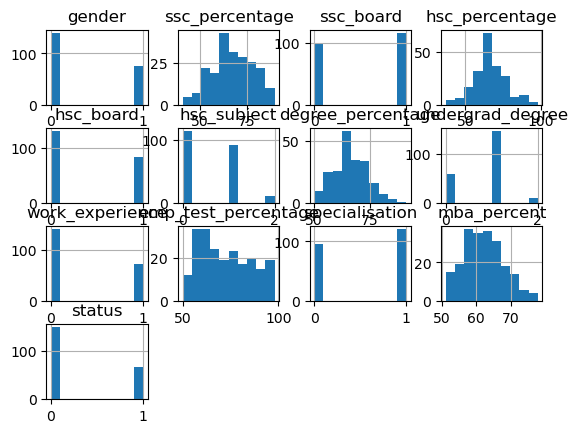

In [10]:
# now let's look at histograms of the variables to look for any skewness
df.hist()

The skewed variables seem to be gender, hsc_board, hsc_subject, undergrad_degree, work_experience, and status.

In [11]:
df = pd.read_csv('data_categorical.csv')
df

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,0,67.00,0,91.00,0,0,58.00,0,0,55.0,0,58.80,0
1,0,79.33,1,78.33,0,1,77.48,0,1,86.5,1,66.28,0
2,0,65.00,1,68.00,1,2,64.00,1,0,75.0,1,57.80,0
3,0,56.00,1,52.00,1,1,52.00,0,0,66.0,0,59.43,1
4,0,85.80,1,73.60,1,0,73.30,1,0,96.8,1,55.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,0,82.00,0,0,77.60,1,0,91.0,1,74.49,0
211,0,58.00,0,60.00,0,1,72.00,0,0,74.0,1,53.62,0
212,0,67.00,0,67.00,0,0,73.00,1,1,59.0,1,69.72,0
213,1,74.00,0,66.00,0,0,58.00,1,0,70.0,0,60.23,0


In [12]:
#let's define a function to undersample variables
def undersample(df, var):
    max_len = min(df[var].value_counts())
    sets = []
    levels = df[var].unique()
    for l in levels:
        sets.append(df[df[var] == l].sample(n=max_len, replace=False))
    return pd.concat(sets)

In [13]:
# undersample gender
df = undersample(df, 'gender')
df['gender'].value_counts()

0    76
1    76
Name: gender, dtype: int64

array([[<AxesSubplot: title={'center': 'gender'}>,
        <AxesSubplot: title={'center': 'ssc_percentage'}>,
        <AxesSubplot: title={'center': 'ssc_board'}>,
        <AxesSubplot: title={'center': 'hsc_percentage'}>],
       [<AxesSubplot: title={'center': 'hsc_board'}>,
        <AxesSubplot: title={'center': 'hsc_subject'}>,
        <AxesSubplot: title={'center': 'degree_percentage'}>,
        <AxesSubplot: title={'center': 'undergrad_degree'}>],
       [<AxesSubplot: title={'center': 'work_experience'}>,
        <AxesSubplot: title={'center': 'emp_test_percentage'}>,
        <AxesSubplot: title={'center': 'specialisation'}>,
        <AxesSubplot: title={'center': 'mba_percent'}>],
       [<AxesSubplot: title={'center': 'status'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

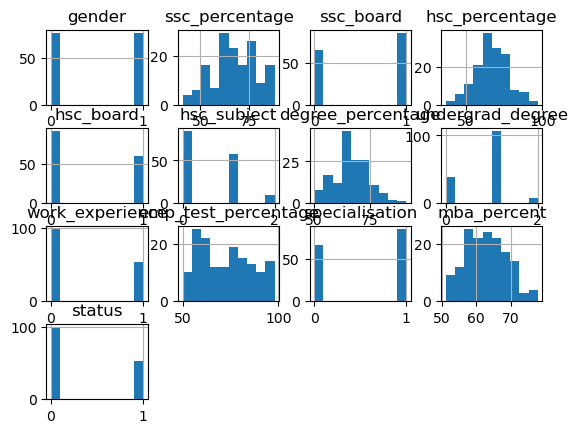

In [14]:
# let's look at the histograms again
df.hist()

ssc_board looks a little skewed - let's inspect its actual values to see just how much

In [15]:
df['ssc_board'].value_counts()

1    86
0    66
Name: ssc_board, dtype: int64

Not too bad; next let's inspect hsc_board.

In [16]:
df['hsc_board'].value_counts()

0    92
1    60
Name: hsc_board, dtype: int64

Also not that bad, hsc_subject is very obviously skewed though. One of the categories seems to have a very small value, so undersampling might not be the approach here. Let's inspect:

In [17]:
df['hsc_subject'].value_counts()

0    84
1    58
2    10
Name: hsc_subject, dtype: int64

The smallest value is 9 - no way to undersample that without losing too much data. Looks like dropping '2' would be the best approach.

In [18]:
df = df[df['hsc_subject'] != 2]
df['hsc_subject'].value_counts()

0    84
1    58
Name: hsc_subject, dtype: int64

Inspect histogram again:

array([[<AxesSubplot: title={'center': 'gender'}>,
        <AxesSubplot: title={'center': 'ssc_percentage'}>,
        <AxesSubplot: title={'center': 'ssc_board'}>,
        <AxesSubplot: title={'center': 'hsc_percentage'}>],
       [<AxesSubplot: title={'center': 'hsc_board'}>,
        <AxesSubplot: title={'center': 'hsc_subject'}>,
        <AxesSubplot: title={'center': 'degree_percentage'}>,
        <AxesSubplot: title={'center': 'undergrad_degree'}>],
       [<AxesSubplot: title={'center': 'work_experience'}>,
        <AxesSubplot: title={'center': 'emp_test_percentage'}>,
        <AxesSubplot: title={'center': 'specialisation'}>,
        <AxesSubplot: title={'center': 'mba_percent'}>],
       [<AxesSubplot: title={'center': 'status'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

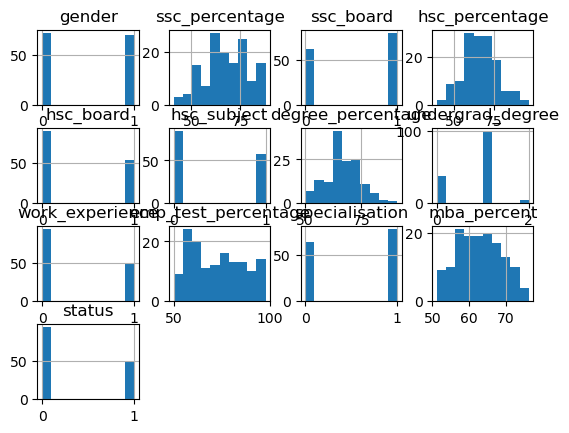

In [19]:
df.hist()

Looks like undergrad_degree is next.

In [20]:
df['undergrad_degree'].value_counts()

1    100
0     38
2      4
Name: undergrad_degree, dtype: int64

Same issue as before: we drop '2'.

array([[<AxesSubplot: title={'center': 'gender'}>,
        <AxesSubplot: title={'center': 'ssc_percentage'}>,
        <AxesSubplot: title={'center': 'ssc_board'}>,
        <AxesSubplot: title={'center': 'hsc_percentage'}>],
       [<AxesSubplot: title={'center': 'hsc_board'}>,
        <AxesSubplot: title={'center': 'hsc_subject'}>,
        <AxesSubplot: title={'center': 'degree_percentage'}>,
        <AxesSubplot: title={'center': 'undergrad_degree'}>],
       [<AxesSubplot: title={'center': 'work_experience'}>,
        <AxesSubplot: title={'center': 'emp_test_percentage'}>,
        <AxesSubplot: title={'center': 'specialisation'}>,
        <AxesSubplot: title={'center': 'mba_percent'}>],
       [<AxesSubplot: title={'center': 'status'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

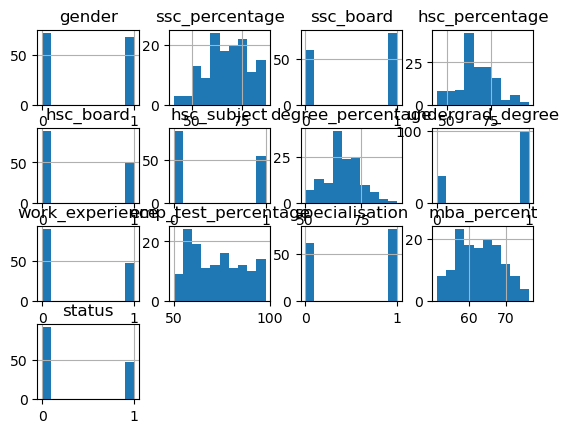

In [21]:
df = df[df['undergrad_degree'] != 2]
df.hist()

The remaining variables look alright; they are slightly skewed, but if we continue to drop categories and keep undersampling, we won't be left with enough to construct reliable models.

<h2> Building the Model </h2>

It's pretty obvious that a decision tree classifier would be a good model to try, as most of the variables are categorical, with only some continuous variables. So let's try that first.

In [22]:
model = DecisionTreeClassifier()

In [23]:
accuracy = -1
for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(df.drop('status', axis='columns'), df['status'], test_size=0.2)
    model.fit(x_train, y_train)
    predicted = model.predict(x_test)
    cm = confusion_matrix(y_test, predicted)
    score = (cm[0][0] + cm[1][1])/len(y_test)
    if score > accuracy:
        accuracy = score
        
accuracy # this will be the highest accuracy achieved from 100 models

0.8928571428571429

Using a decision tree classifier, this is pretty accurate. Let's save this model (for reference, the highest accuracy I observed out of the 100 models was ~93%):

In [24]:
pickle.dump(model, open('final_model.sav', 'wb'))